Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import re # regex pattern matching
import warnings
warnings.filterwarnings('ignore')# Ignoring warnings

Importing Dataset

In [2]:
zmt=pd.read_csv(r"C:\Users\vedan\OneDrive\Desktop\Python Eda\Eda datasets\zomato_reviews.csv")
zmt.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Understanding the Dataset

In [3]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Here we can see we are having 17 columns and some columns including NaN values and incorrect data_types.

Ex: approx_cost(for two people) column has integer values but having object data_type.

.



Dropping Unnecessary Columns

In [4]:
zmt.drop(['url','reviews_list','menu_item','address','phone','dish_liked'],axis=1,inplace=True)

In [5]:
zmt.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


.  



Renaming Columns

In [7]:
zmt.rename(columns={'name':'restaurants','rate':'rating','cuisines':'food_type','listed_in(type)':'type','listed_in(city)':'city','approx_cost(for two people)':'cost'},inplace=True)

In [8]:
zmt.head(3)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari


.



Dropping Null values

In [9]:
zmt.dropna(inplace = True)

In [10]:
zmt.isnull().sum()

restaurants     0
online_order    0
book_table      0
rating          0
votes           0
location        0
rest_type       0
food_type       0
cost            0
type            0
city            0
dtype: int64

.





Cleaning Individual Columns

Column : 'restaurants'

In [11]:
zmt.groupby('restaurants').count().head() # we are grouping the restaurants to see the restaurant names and their count.

,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
restaurants,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3,3,3,3,3,3,3,3,3,3


Here we can see we have got restaurant names having disturbed characters

so we need to remove that characters from the name using pattern matching to get original names.

In [12]:
# '[Ãx][^A-Za-z]+' pattern is a disturbed characters.And Replacing those characters with empty space.
zmt['restaurants']=zmt['restaurants'].str.replace('[Ãx][^A-Za-z]+','',regex=True)

In [13]:
zmt.groupby('restaurants').count().head()

,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
restaurants,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6
100C,3,3,3,3,3,3,3,3,3,3


In [14]:
zmt['restaurants']=zmt['restaurants'].str.replace('Caf-|Caf ','Cafe ',regex=True) # replacing the Caf- or Caf names with cafe using pattern matching.

.



Column: 'online_order'

In [15]:
zmt['online_order'].unique()

array(['Yes', 'No'], dtype=object)

Here, we can see only Yes and No values are present so there is no need to clean the column.

.



Column: 'book_table'

In [16]:
zmt['book_table'].unique()

array(['Yes', 'No'], dtype=object)

Here also we got the same result so no need to perform any cleaning

.




Column: 'rating'

In [18]:
zmt['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Need changes:
.


Remove 'NEW' and '-' values.
.


Remove '/5' from the rating.
.



Covert datatype object to float (float_datatype has decimal values).

In [20]:
replace= lambda x:x.replace('/5','') # lambda function to replace /5 to empty string

new=[] # list to store cleaned values

for val in map(replace,zmt['rating']): # map function to read data from column and replace /5 to empty string
    if val!='NEW' and val!='-': # excluding 'NEW' and '-' values
        var=float(val) # converting the result in float datatype and storing into one variable
    new.append(var) # appending cleaned values in created list

    
zmt['rating']=new # updating rating column with new and cleaned values

In [21]:
zmt['rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [22]:
zmt['rating'].dtype

dtype('float64')

.



Column: 'votes'

In [23]:
zmt['votes'].isnull().sum()

0

Here, we can see there is no null values and having correct datatype. So, no need to clean anything.

.




Column: 'location'

In [24]:
zmt['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

Here, aslo all things are correct so no need to perform data cleaning.

.




Column: 'rest_type' and 'food_type'


In [26]:
zmt['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [27]:
zmt['rest_type'].isnull().sum()

0

In [28]:
zmt['food_type'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [29]:
zmt['food_type'].isnull().sum()

0

As we see column 'rest_type' and 'food_type' are also correct so no need to perform any data cleaning.

.



Column: 'cost'

In [30]:
zmt['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

Changes needed:
.


Remove ',' from values
.


Change datatype object to integer(int)

In [31]:
zmt['cost']= zmt['cost'].apply(lambda x:x.replace(",","")).astype(int) 

In [32]:
zmt['cost'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
       2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
         40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
        360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500])

In [33]:
zmt['cost'].dtype

dtype('int32')

.




Column: 'type'

In [34]:
zmt['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [35]:
zmt['type'].isnull().sum()

0

Here also all values are correct and having correct datatype so no need to perform cleaning.

.



Column: 'city'

In [36]:
zmt['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [37]:
zmt['city'].isnull().sum()

0

Here also all values are correct and having correct datatype so no need to perform cleaning.

.




Dropping Duplicates

In [39]:
zmt.duplicated().sum()

80

We have got 80 duplicate values in our dataset we need to remove those.

In [42]:
zmt.drop_duplicates(inplace=True)
zmt.reset_index(drop=True,inplace=True)

In [43]:
zmt.duplicated().sum()

0

As a final step we removed all duplicate values from our dataset and we got fully cleaned data.

In [44]:
zmt.head()

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [45]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43453 entries, 0 to 43452
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   43453 non-null  object 
 1   online_order  43453 non-null  object 
 2   book_table    43453 non-null  object 
 3   rating        43453 non-null  float64
 4   votes         43453 non-null  int64  
 5   location      43453 non-null  object 
 6   rest_type     43453 non-null  object 
 7   food_type     43453 non-null  object 
 8   cost          43453 non-null  int32  
 9   type          43453 non-null  object 
 10  city          43453 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 3.5+ MB


In [46]:
zmt.shape

(43453, 11)

.



Data Visualization (Insights)

In [48]:
zmt.head()

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


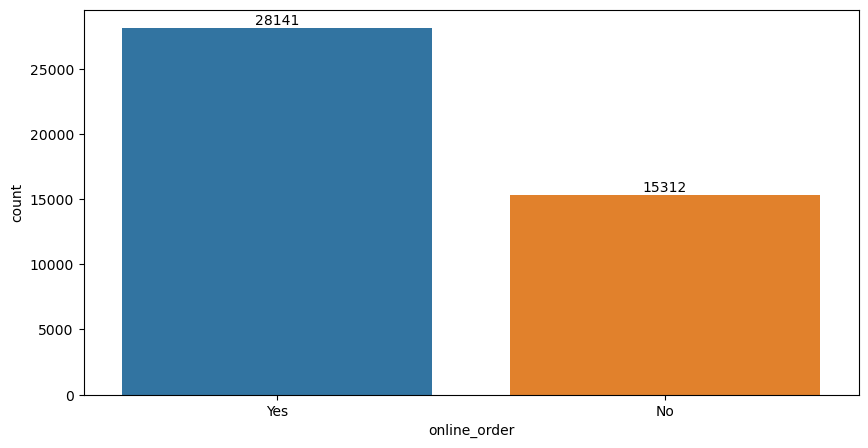

In [51]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='online_order',data=zmt) 


for bars in ax.containers:
    ax.bar_label(bars)


By observing the graph, we can say that 28141 restaurants are accepting online orders and 15312 restaurants not accepting online orders.

.


2) Find best location

We have two columns 'rating' and 'votes' so by geeting the average of those columns with repect to 'location' we can find the best location.

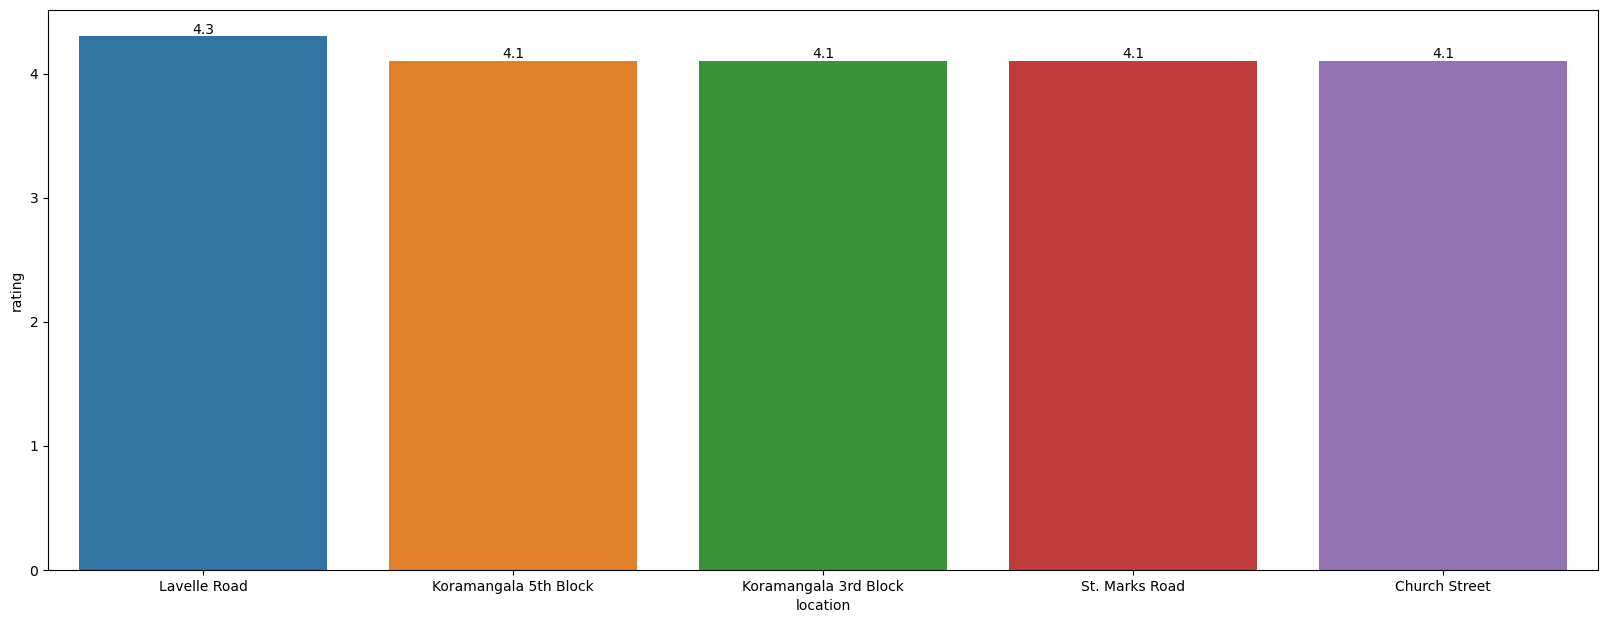

In [54]:
plt.figure(figsize=(20,16))
ax = plt.subplot(2,1,1) 

loc_rating=zmt.groupby('location').agg({'rating':'median'})
rating_sorted_loc=loc_rating.sort_values('rating',ascending=False).head(5).reset_index() 
# sorting location on avg of votes in descending order and reading first 5 values

ab=sns.barplot(x='location',y='rating',data=rating_sorted_loc)

for bars in ab.containers:
    ab.bar_label(bars)

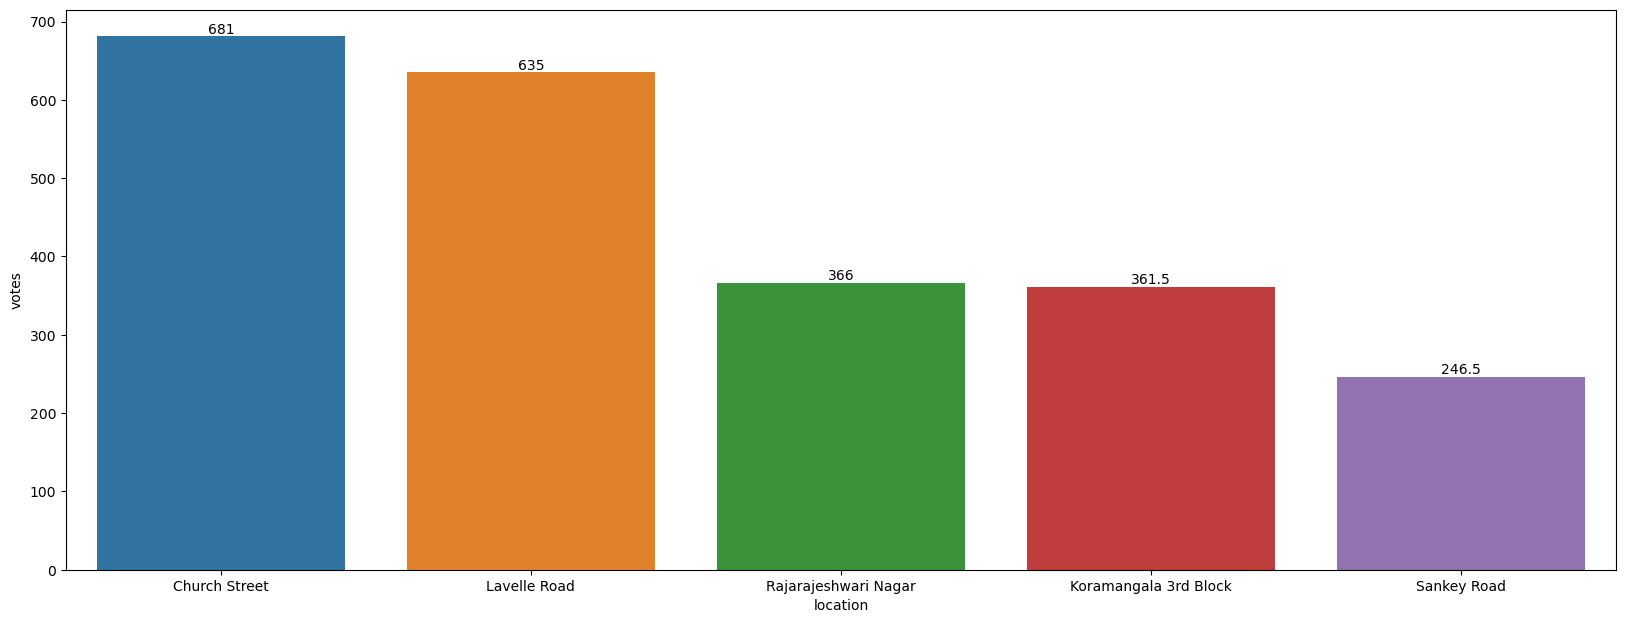

In [55]:
plt.figure(figsize=(20,16))
ax = plt.subplot(2,1,2)
loc_votes=zmt.groupby('location').agg({'votes':'median'})
votes_sorted_loc=loc_votes.sort_values('votes',ascending=False).head(5).reset_index() # sorting location on avg of rating in descending order and reading first 5 values
ab=sns.barplot(x='location',y='votes',data=votes_sorted_loc)


for bars in ab.containers:
    ab.bar_label(bars)

By observing the above graphs,'levelle Road' has an high rating and votes as well as compare to other.

So, we can say that 'levelle Road' is a best location by comparing 'votes' and 'rating' of locations.

.


3) Find Types of restaurants and their count.

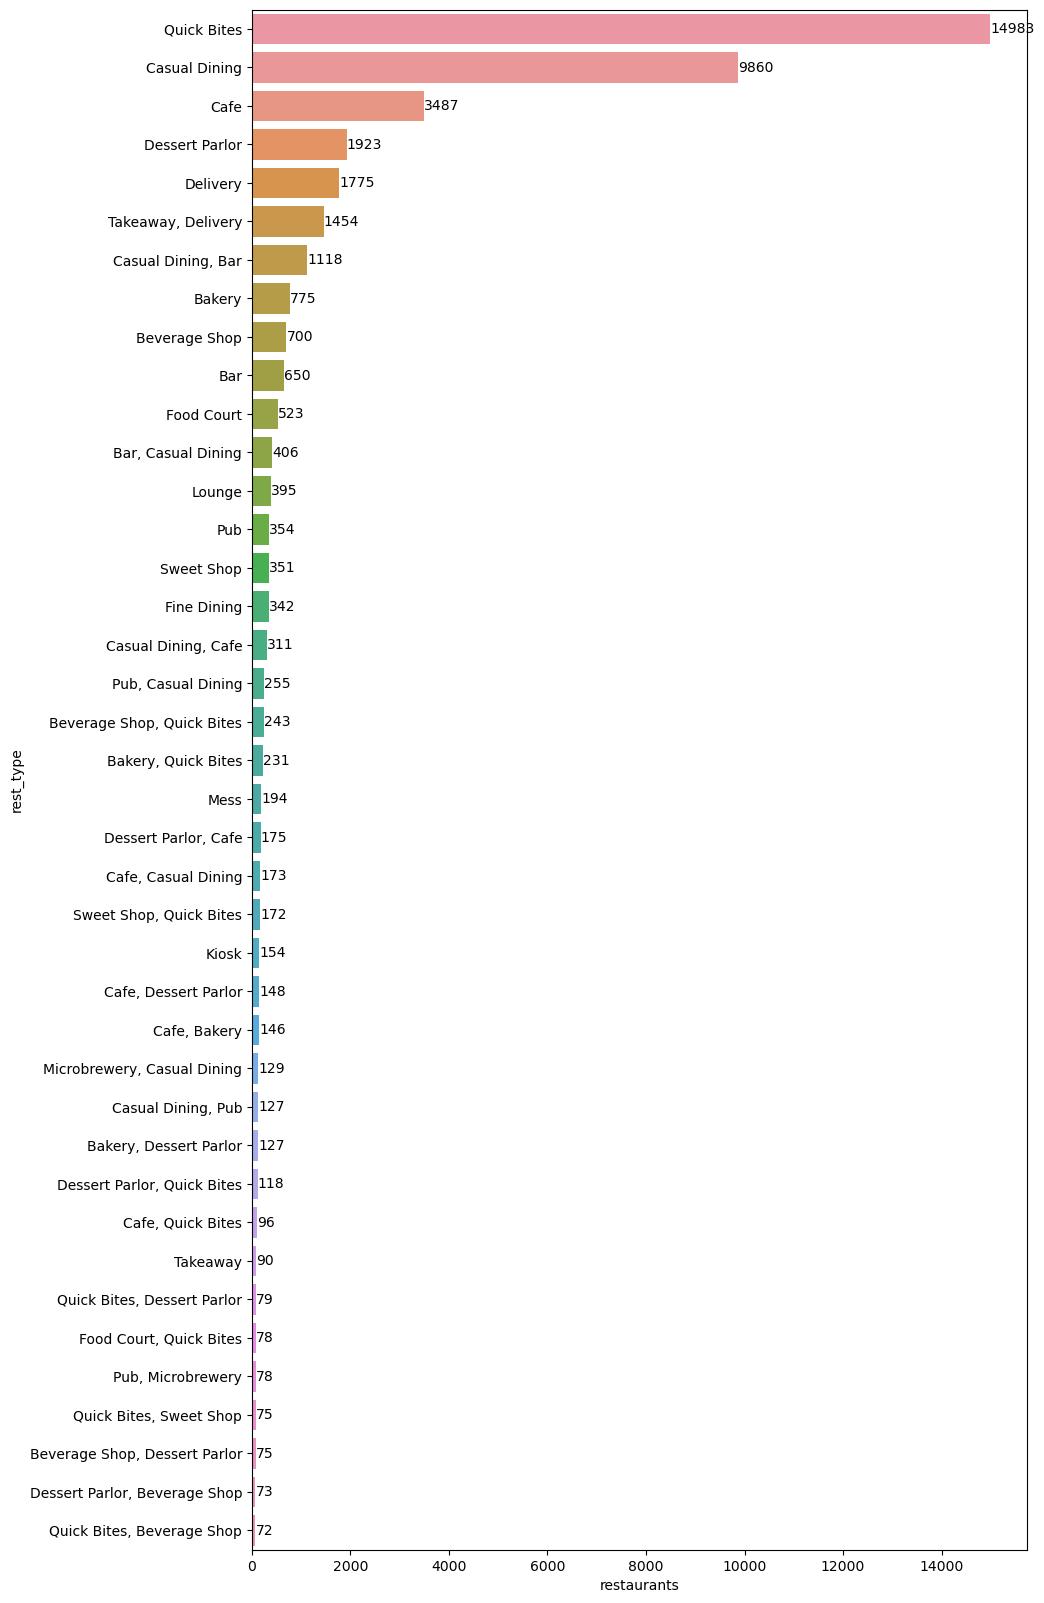

In [57]:
plt.figure(figsize=(10,20))

rest_types=zmt.groupby('rest_type')['restaurants'].count().reset_index()# grouping restaurants types and getting 'restaurant' count

sorted_rest_types=rest_types.sort_values('restaurants',ascending=False).head(40) # sorting restaurant types on 'restaurants' counts in descending order and reading 40 values

rest_types.rest_type.count()

ab=sns.barplot(x='restaurants',y='rest_type',data=sorted_rest_types,orient='h')

for bars in ab.containers:
    ab.bar_label(bars)

Highest Orders count is of Quick Bites restaurant type which is 14983, followed by Casual dining which is at 9860

.



4) Find Cost's Of restaurants

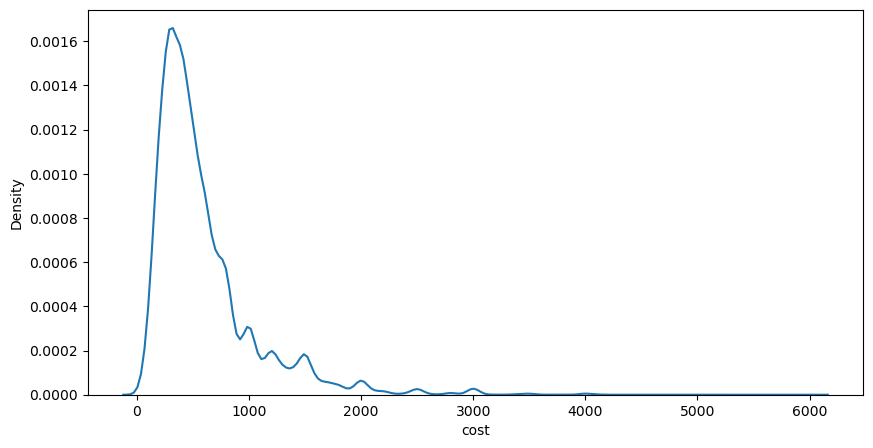

In [60]:
plt.figure(figsize=(10,5))
sns.kdeplot(x='cost',data=zmt)
plt.show()

By observing above kde plot we can say that most of the restaurants have cost between 1 to 1000Rs. for food and remaining have above 1000Rs for their food.

.



4) Find count of restaurants have table booking facility.

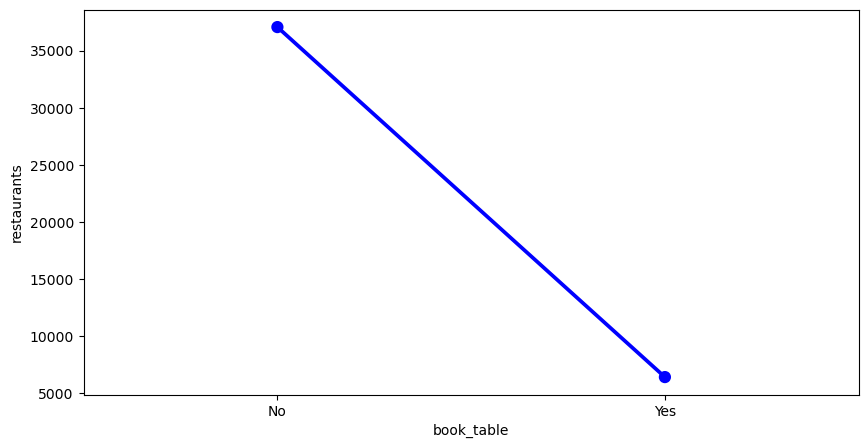

In [64]:
plt.figure(figsize=(10,5))

table_booking= zmt.groupby('book_table')['restaurants'].count().reset_index()

sns.pointplot(x='book_table',y='restaurants',color='b',data=table_booking)

plt.show()

By seeing above pointplot we can say that only 7000 restaurants have table booking facility and 35000+ restaurants don't have facility of table booking.

5) Gaussian Rest Type(Normal Distribution) of Rating

<Axes: xlabel='rating', ylabel='Density'>

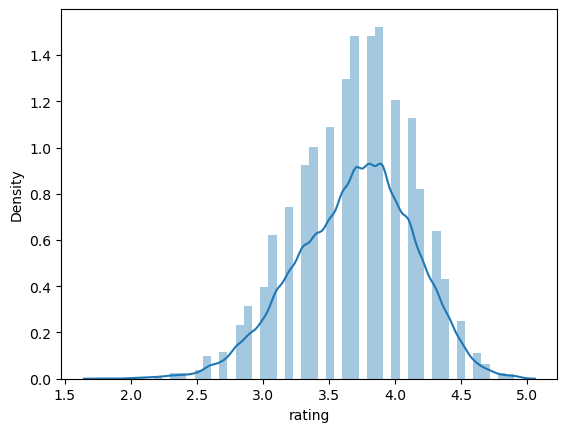

In [65]:
sns.distplot(zmt['rating'])

We got a normal distribution form of our rating and we observe that we have maximum ratings between 3.5 to 4.5.

.


6) Find the most profitable type of restaurant.

In [67]:
df1=zmt.groupby('type').agg({'cost':'mean'})
df1.head()


,cost
type,
Buffet,1310.300926
Cafes,639.269981
Delivery,488.696191
Desserts,407.528958
Dine-out,644.022810


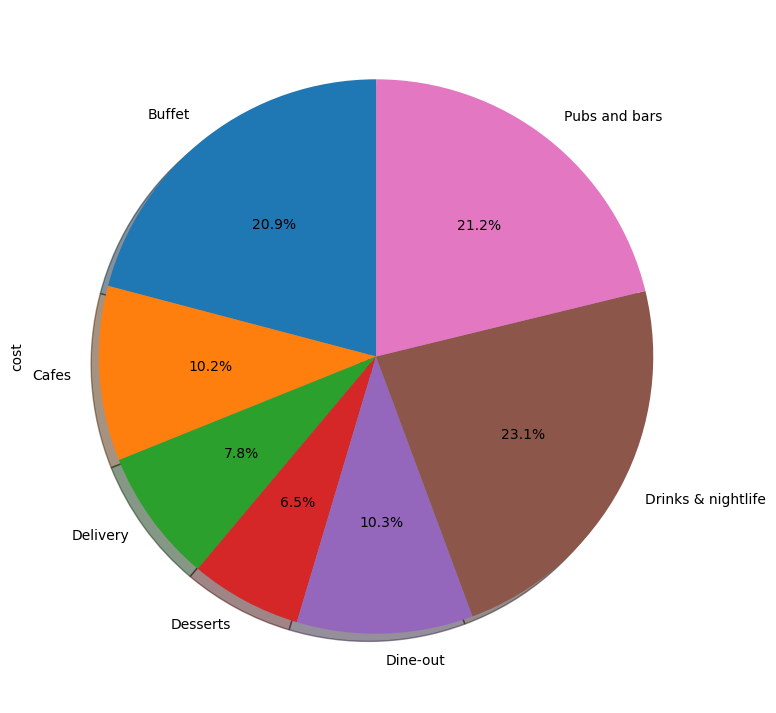

In [69]:
df1['cost'].plot(kind='pie',autopct='%1.1f%%',figsize=(9,9),shadow=True,startangle=90)
plt.show()

Here, by seeing the total percentage of average cost we can observe that the restaurants having Drink and Nightlife facility are in high profit than other types.

## Insights Generated

1) 28141 restaurants are accepting online orders and 15312 restaurants not accepting online orders.

2) 'levelle Road' is a best location to open a new restaurant by comparing 'votes' and 'rating' of locations.

3) Highest Orders count is of Quick Bites restaurant type which is 14983, followed by Casual dining which is at 9860.

4) Most of the restaurants have cost between 1 to 1000 Rs.

5) Most of the restaurants have ratings between 3.5 to 4.5.

6) Restaurants having Drink and Nightlife facility are in high profit than other types.

7) Only 7000 restaurants have table booking facility and 35000+ restaurants don't have facility of table booking.


## Conclusion

If we are looking to open a new restaurant in Bangalore city, 'levelle Road' is the best location and the restaurant type should be Quick Bites or Casual dining having a Drink and Nightlife facility. The restaurant should have price range of 1 to 1000 Rs for majority of its food items. They should have table booking facility and accept online orders. They should maintain a rating between 3.5 to 4.5.